In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import datetime
import matplotlib.pyplot as plt
import matplotlib

#%pylab inline 
%config InlineBackend.figure_format = 'svg'
%matplotlib inline 
%config IPCompleter.greedy=True
sns.set_style("white")

**Challenge 1**

Plot domestic total gross over time.




In [3]:
df = pd.read_csv('2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [6]:
# convert realese date to datetime object
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format="%Y-%m-%d %H:%M:%S")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.5+ KB


In [8]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [14]:
# groupby the date 
gp1 = df.groupby('ReleaseDate').sum().reset_index()
gp1.head()

,ReleaseDate,Budget,DomesticTotalGross,Runtime
0,2013-01-04,0.0,34341945,92
1,2013-01-11,62500000.0,86042586,193
2,2013-01-18,15000000.0,71628180,100
3,2013-01-25,50000000.0,55703475,88
4,2013-02-01,35000000.0,66380662,97


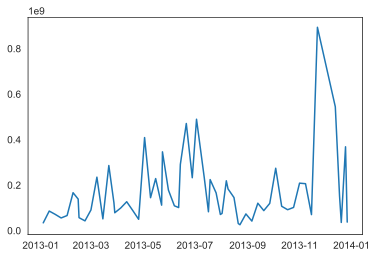

In [18]:
plt.plot(gp1['ReleaseDate'],gp1['DomesticTotalGross']);

**Challenge 2**

Plot runtime vs. domestic total gross.

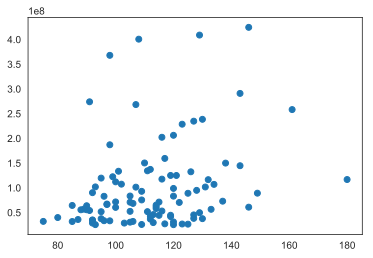

In [17]:
plt.scatter(df['Runtime'],df['DomesticTotalGross']);

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.



In [25]:
gp2 = df.groupby('Rating').agg({'Runtime': 'mean', 'DomesticTotalGross': 'sum'}).reset_index()
gp2

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,268492764
1,PG,99.933333,1967035741
2,PG-13,117.510638,5238139144
3,R,110.729730,2586019873


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.



In [27]:
g3 = df.groupby(['Rating','ReleaseDate']).sum().reset_index()
g3 = g3[['Rating','ReleaseDate','DomesticTotalGross']]
g3.head()


,Rating,ReleaseDate,DomesticTotalGross
0,G,2013-06-21,268492764
1,PG,2013-02-15,57012977
2,PG,2013-03-08,234911825
3,PG,2013-03-22,187168425
4,PG,2013-05-24,107518682


In [28]:
n=g3['Rating'].unique()
n

array(['G', 'PG', 'PG-13', 'R'], dtype=object)

In [ ]:
for rating in n:
    plt.plot

**Challenge 5**

What director in your dataset has the highest gross per movie?



In [24]:
gp5 = df.groupby('Director').mean().sort_values('DomesticTotalGross').reset_index()
gp5.head(1)

,Director,Budget,DomesticTotalGross,Runtime
0,Spike Jonze,23000000.0,25568251.0,120.0


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."